# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(5)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
6379,51342,81228,5172,2012,2012_House-G_NY-19,NY-19,House-G,House-G,Public Opinion Strategies,260,Live Phone,R,10/25/12,400.0,Julian Schreibman,7072,DEM,39.0,Christopher P. Gibson,10629,REP,49.0,NaN,-10.0,11/6/12,47.15,52.85,-5.71,-4.29,1.0,for Matthew A. Doheny
9584,63454,116639,7729,2020,2020_Pres-D_NH,NH,Pres-P,Pres-D,Emerson College,88,IVR/Online/Text,NaN,2/4/20,500.0,Bernard Sanders,13257,DEM,31.4,Pete Buttigieg,13345,DEM,21.4,11.4,10.0,2/11/20,25.60,24.28,1.32,NaN,1.0,for 7News
8437,47857,74915,49,2016,2016_Gov-G_IN,IN,Gov-G,Gov-G,Monmouth University,215,Live Phone,NaN,10/29/16,402.0,John R. Gregg,10217,DEM,48.0,Eric Joseph Holcomb,10271,REP,42.0,4.0,6.0,11/8/16,45.42,51.38,-5.95,11.95,0.0,NaN
10418,72153,135303,7824,2020,2020_Gov-G_NC,NC,Gov-G,Gov-G,Gravis Marketing,124,IVR/Online,NaN,10/27/20,614.0,Roy A. Cooper,13404,DEM,51.0,Dan Forest,13406,REP,43.0,NaN,8.0,11/3/20,51.52,47.01,4.51,3.49,1.0,NaN
5119,51714,81762,4548,2010,2010_House-G_FL-2,FL-2,House-G,House-G,Susquehanna Polling & Research Inc.,326,IVR,NaN,10/16/10,830.0,Allen Boyd,10738,DEM,38.0,Steve Southerland II,10739,REP,50.0,2.0,-12.0,11/2/10,41.35,53.60,-12.25,0.25,1.0,NaN


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

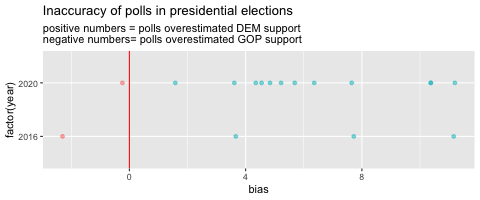

In [6]:
%%R -h 200

df_siena <- df %>% 
    filter(pollster == 'Siena College/The New York Times Upshot') %>%
    filter(type_simple=='Pres-G') 

ggplot(df_siena) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


In [10]:
df.query("type_detail == 'Pres-G' and pollster=='Siena College/The New York Times Upshot'")


,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
8137,47325,74047,629,2016,2016_Pres-G_NC,NC,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/22/16,792.0,Hillary Rodham Clinton,9207,DEM,47.5,Donald Trump,9849,REP,40.0,8.0,7.5,11/8/16,46.17,49.83,-3.66,11.16,0.0,for New York Times | New York Times Upshot; av...
8203,47551,74387,640,2016,2016_Pres-G_PA,PA,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/24/16,824.0,Hillary Rodham Clinton,9207,DEM,47.5,Donald Trump,9849,REP,40.5,6.0,7.0,11/8/16,47.46,48.18,-0.72,7.72,0.0,for New York Times Upshot; average of multiple...
8258,47771,74762,611,2016,2016_Pres-G_FL,FL,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/26/16,815.0,Hillary Rodham Clinton,9207,DEM,43.5,Donald Trump,9849,REP,47.0,4.0,-3.5,11/8/16,47.82,49.02,-1.20,-2.30,1.0,for New York Times Upshot; average of multiple...
8869,48524,76066,629,2016,2016_Pres-G_NC,NC,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,11/5/16,800.0,Hillary Rodham Clinton,9207,DEM,44.0,Donald Trump,9849,REP,44.0,3.0,0.0,11/8/16,46.17,49.83,-3.66,3.66,0.5,for New York Times Upshot
9846,71454,133826,6221,2020,2020_Pres-G_GA,GA,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/16/20,759.0,Joseph R. Biden Jr.,13256,DEM,45.0,Donald Trump,13254,REP,45.0,2.0,0.0,11/3/20,49.47,49.24,0.24,-0.24,0.5,NaN
9877,71439,133797,6210,2020,2020_Pres-G_US,US,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/17/20,987.0,Joseph R. Biden Jr.,13256,DEM,50.0,Donald Trump,13254,REP,41.0,2.0,9.0,11/3/20,51.31,46.86,4.45,4.55,1.0,NaN
9994,71553,134039,6223,2020,2020_Pres-G_IA,IA,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/19/20,753.0,Joseph R. Biden Jr.,13256,DEM,46.0,Donald Trump,13254,REP,43.0,2.0,3.0,11/3/20,44.89,53.09,-8.20,11.20,0.0,NaN
9995,71673,134271,6227,2020,2020_Pres-G_KS,KS,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/19/20,755.0,Joseph R. Biden Jr.,13256,DEM,41.0,Donald Trump,13254,REP,48.0,4.0,-7.0,11/3/20,41.56,56.21,-14.65,7.65,1.0,NaN
10000,71747,134429,6237,2020,2020_Pres-G_MT,MT,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/19/20,758.0,Joseph R. Biden Jr.,13256,DEM,43.0,Donald Trump,13254,REP,49.0,3.0,-6.0,11/3/20,40.55,56.92,-16.37,10.37,1.0,NaN
10130,71967,134907,6254,2020,2020_Pres-G_TX,TX,Pres-G,Pres-G,Siena College/The New York Times Upshot,448,Live Phone,NaN,10/23/20,802.0,Joseph R. Biden Jr.,13256,DEM,43.0,Donald Trump,13254,REP,47.0,3.0,-4.0,11/3/20,46.48,52.06,-5.58,1.58,1.0,NaN


- Rachel and Pooja's ANSWER: Compared to the mean and median bias of 0.6263 and 0.6800 respectively, the NYT/Siena College poll is biased towards democrats in both 2016 and 2020. They overestimated the democrats. At least half of the polling results had a bias above the 3rd quartile of 4.6200 too. 

👉 **Jayhawk Consulting**

In [11]:
df_jayhawk = df[df['pollster'].str.contains('Jayhawk')]
df_jayhawk.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice


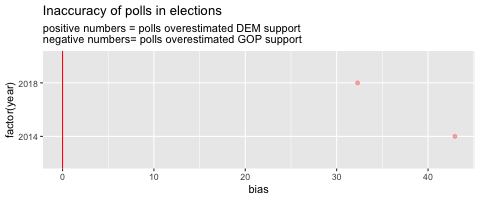

In [21]:
%%R -h 200

df_jayhawk <- df %>% 
    filter(pollster == 'Jayhawk Consulting Services')

ggplot(df_jayhawk) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

- Rachel and Pooja's ANSWER: Jayhawk very much overestimated the democrats. It's 2014 poll was likely the maximum bias, and it's 2018 bias was close to it as well. 

👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [27]:
df_fox = df[df['pollster'].str.contains('Fox News/Beacon Research')]
df_fox.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
6069,30144,36088,662,2012,2012_Pres-G_FL,FL,Pres-G,Pres-G,Fox News/Beacon Research/Shaw & Co. Research,103,Live Phone,NaN,10/18/12,1130.0,Barack Obama,16,DEM,45.0,Mitt Romney,9,REP,48.0,NaN,-3.0,11/6/12,50.01,49.13,0.88,-3.88,0.0,NaN
6080,30142,36086,688,2012,2012_Pres-G_OH,OH,Pres-G,Pres-G,Fox News/Beacon Research/Shaw & Co. Research,103,Live Phone,NaN,10/18/12,1131.0,Barack Obama,16,DEM,46.0,Mitt Romney,9,REP,43.0,NaN,3.0,11/6/12,50.67,47.69,2.98,0.02,1.0,NaN
6307,30311,36340,698,2012,2012_Pres-G_VA,VA,Pres-G,Pres-G,Fox News/Beacon Research/Shaw & Co. Research,103,Live Phone,NaN,10/24/12,1126.0,Barack Obama,16,DEM,44.0,Mitt Romney,9,REP,46.0,NaN,-2.0,11/6/12,51.16,47.28,3.87,-5.87,0.0,NaN
6510,43261,36642,37,2012,2012_Pres-G_US,US,Pres-G,Pres-G,Fox News/Beacon Research/Shaw & Co. Research,103,Live Phone,NaN,10/29/12,1128.0,Barack Obama,16,DEM,46.0,Mitt Romney,9,REP,46.0,NaN,0.0,11/6/12,51.02,47.18,3.85,-3.85,0.5,for FOX News
7329,36137,49088,8271,2014,2014_House-G_US,US,House-G,House-G,Fox News/Beacon Research/Shaw & Co. Research,103,Live Phone,NaN,10/26/14,734.0,Generic Candidate,9973,DEM,45.0,Generic Candidate,9974,REP,44.0,NaN,1.0,11/4/14,44.84,50.42,-5.59,6.59,0.0,for FOX News


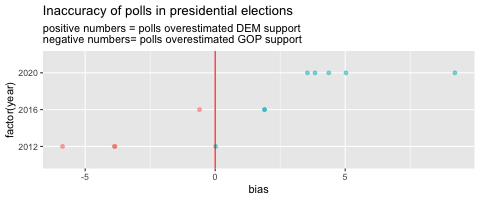

In [37]:
%%R -h 200

df_fox <- df %>% 
    filter(pollster == 'Fox News/Beacon Research/Shaw & Co. Research')%>%
    filter(type_detail=='Pres-G') 

ggplot(df_fox) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

- Rachel and Pooja's ANSWER: The Fox news polls had shift from being biased towards the Republican nominee in 2012 to overestimating the Democrat nominee in 2020. In general, it isn't too inaccurate as most polls had a bias of -5 and 5. 

👉 **Brown University**

In [46]:
df_brown = df[df['pollster'].str.contains('Brown University')]
df_brown = df_brown.dropna(subset=['bias'])
df_brown

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
592,6416,7883,845,2000,2000_Pres-G_RI,RI,Pres-G,Pres-G,Brown University,35,Live Phone,NaN,10/22/00,370.0,Al Gore,222,DEM,47.0,George W. Bush,241,REP,29.0,8.0,18.0,11/7/00,60.99,31.91,29.08,-11.08,1.0,NaN
602,6416,27199,1707,2000,2000_Sen-G_RI,RI,Sen-G,Sen-G,Brown University,35,Live Phone,NaN,10/22/00,370.0,Robert A. Weygand,3854,DEM,28.0,Lincoln Chafee,3855,REP,52.0,2.0,-24.0,11/7/00,41.15,56.88,-15.73,-8.27,1.0,NaN
1251,25424,88455,1409,2002,2002_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/20/02,418.0,Myrth York,12931,DEM,41.0,Donald Carcieri,12932,REP,34.0,NaN,7.0,11/5/02,45.24,54.76,-9.52,16.52,0.0,NaN
1254,25424,30664,1675,2002,2002_Sen-G_RI,RI,Sen-G,Sen-G,Brown University,35,Live Phone,NaN,10/20/02,418.0,Jack Reed,3565,DEM,61.0,Robert G. Tingle,3566,REP,14.0,NaN,47.0,11/5/02,78.43,21.57,56.85,-9.85,1.0,NaN
1257,25424,117562,3067,2002,2002_House-G_RI-1,RI-1,House-G,House-G,Brown University,35,Live Phone,NaN,10/20/02,194.0,Patrick J. Kennedy,13834,DEM,44.0,David W. Rogers,13835,REP,27.0,NaN,17.0,11/5/02,59.88,37.31,22.57,-5.57,1.0,NaN
6985,34002,41321,1239,2014,2014_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/16/14,1129.0,Gina M. Raimondo,8744,DEM,41.6,Allan W. Fung,8740,REP,30.5,9.1,11.1,11/4/14,40.70,36.24,4.47,6.63,1.0,NaN
7319,34316,42010,1239,2014,2014_Gov-G_RI,RI,Gov-G,Gov-G,Brown University,35,Live Phone,NaN,10/26/14,500.0,Gina M. Raimondo,8744,DEM,38.0,Allan W. Fung,8740,REP,37.4,11.8,0.6,11/4/14,40.70,36.24,4.47,-3.87,1.0,NaN


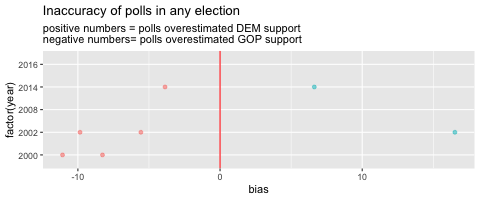

In [47]:
%%R -h 200

df_brown <- df %>% 
    filter(pollster == 'Brown University')

ggplot(df_brown) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in any election',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

#Why did we have to remove NaN values just for Brown? 

- Brown University has been very inaccurate in all the polls it has done so far. In general, it seemed to have overestimated Republicans more than Democrats. 

👉 **American Research Group**

In [50]:
df_ARG = df[df['pollster'].str.contains('American Research Group')]
df_ARG

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
315,7384,9127,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/27/00,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,43.0,NaN,7.0,2/1/00,49.73,45.59,4.14,NaN,1.0,NaN
318,7384,9129,7116,2000,2000_Pres-R_NH,NH,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,1/27/00,600.0,John McCain,14677,REP,36.0,George W. Bush,241,REP,34.0,17.0,2.0,2/1/00,48.53,30.36,18.17,NaN,1.0,NaN
342,7357,9084,7115,2000,2000_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/30/00,600.0,Al Gore,222,DEM,50.0,Bill Bradley,224,DEM,45.0,NaN,5.0,2/1/00,49.73,45.59,4.14,NaN,1.0,NaN
346,7357,9087,7116,2000,2000_Pres-R_NH,NH,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,1/30/00,600.0,John McCain,14677,REP,36.0,George W. Bush,241,REP,38.0,16.0,-2.0,2/1/00,48.53,30.36,18.17,NaN,0.0,NaN
357,7345,9062,7120,2000,2000_Pres-R_SC,SC,Pres-P,Pres-R,American Research Group,9,Live Phone,NaN,2/3/00,600.0,George W. Bush,241,REP,42.0,John McCain,14677,REP,45.0,3.0,-3.0,2/19/00,53.39,41.87,11.52,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9580,63413,116434,7694,2020,2020_Pres-D_IA,IA,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,1/29/20,400.0,Bernard Sanders,13257,DEM,23.0,Pete Buttigieg,13345,DEM,9.0,15.0,14.0,2/3/20,24.71,21.31,3.41,NaN,1.0,NaN
9598,63493,116743,7729,2020,2020_Pres-D_NH,NH,Pres-P,Pres-D,American Research Group,9,Live Phone,NaN,2/9/20,400.0,Bernard Sanders,13257,DEM,28.0,Pete Buttigieg,13345,DEM,20.0,13.0,8.0,2/11/20,25.60,24.28,1.32,NaN,1.0,NaN
10367,72226,135493,6241,2020,2020_Pres-G_NH,NH,Pres-G,Pres-G,American Research Group,9,Live Phone,NaN,10/27/20,600.0,Joseph R. Biden Jr.,13256,DEM,58.0,Donald Trump,13254,REP,39.0,1.0,19.0,11/3/20,52.71,45.36,7.35,11.65,1.0,NaN
10414,72226,135495,6286,2020,2020_Sen-G_NH,NH,Sen-G,Sen-G,American Research Group,9,Live Phone,NaN,10/27/20,600.0,Jeanne Shaheen,13448,DEM,57.0,Corky Messner,14492,REP,40.0,0.0,17.0,11/3/20,56.64,40.99,15.65,1.35,1.0,NaN


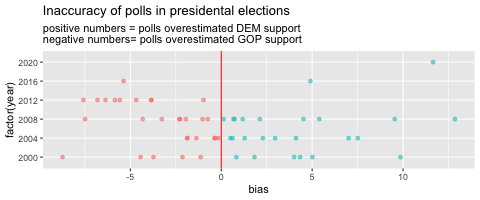

In [53]:
%%R -h 200

df_ARG <- df %>% 
    filter(pollster == 'American Research Group')%>%
    filter(type_detail=='Pres-G') 

ggplot(df_ARG) +
    aes(x=bias, y=factor(year), color=bias>0, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Inaccuracy of polls in presidental elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")

- ARG seems to have been more accurate in the 2000s and then overestimated the Republicans in 2012. Their latest results in 2016 and 2020 were much more biased than before to both parties (although it's only 3 polls). 

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

- Fox News seem to be the most accurate because their bias was in general bellow 5/-5 and so closest to the actual results. 

👉 Which are the least accurate?

- Jayhawk was the least accurate. It's biased was more than 30 and far from the actual results. 

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


- Based it on how far it is from the bias line over the years. 

👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


- We used the method of seeing how off it was in terms of polling the results and the acutal results. And how far off they are from the average bias in each year. For example, Jayhawk was really far from the average in the years it polled. 

👉 In bullet point form, list the **limitations** of your approach 


 - Sample sizes for each company isn't the same
 - They all did different kinds of polls (general, primary, local, nationwide) and so we aren't comparing across the same polls. 

## CLASSWORK:
* Go through each column and decide whether you think it's important or not 
* Should we think about how predictable an election is? So the more predictable it is, the fewer points you get for being right

In [67]:
%%R

pollster_df<- df %>% filter(pollster == 'Siena College/The New York Times Upshot')

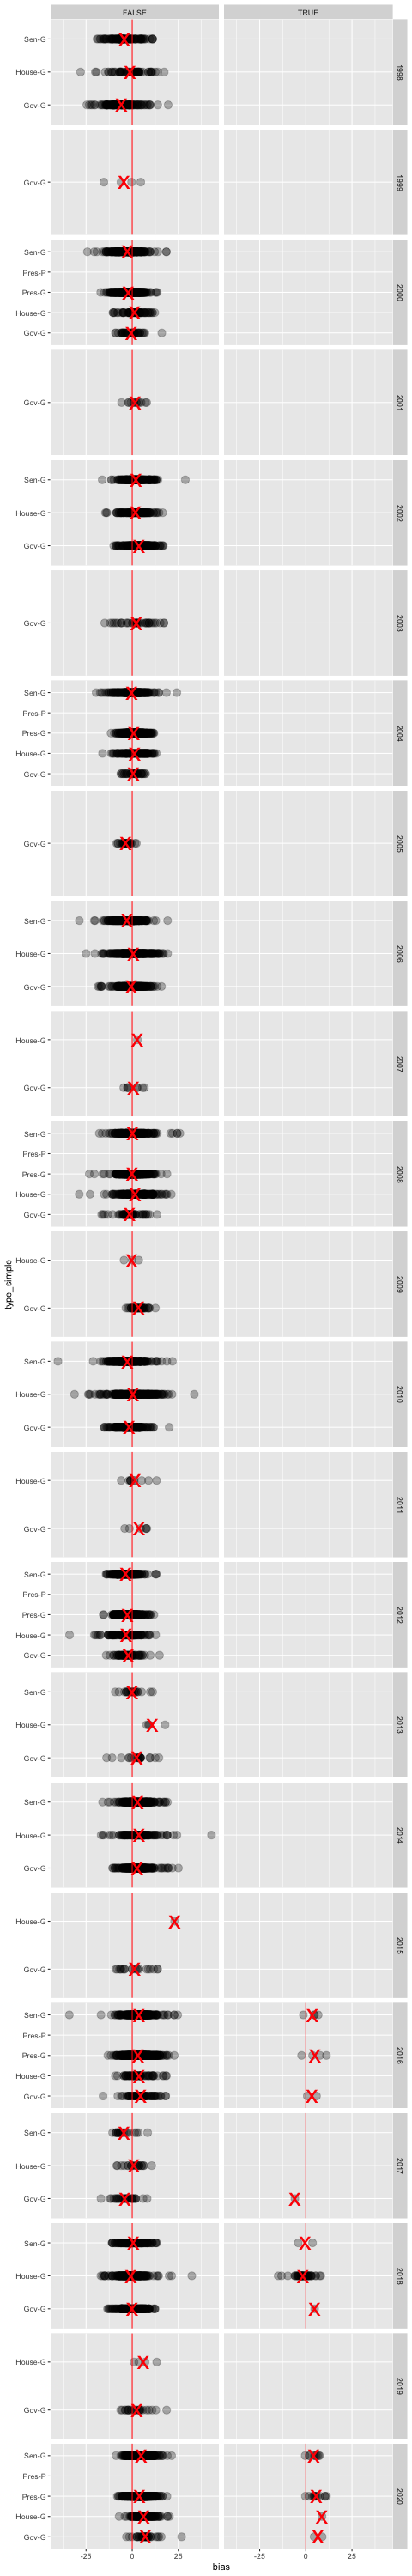

In [93]:
%%R -h 3000

ggplot(df)+ 
    aes(x=bias, y= type_simple)+
    geom_point(size=4, alpha=.3)+
    geom_vline(aes(xintercept=0),color="red") +
    stat_summary(fun.y=mean, geom= "point", shape = 'x', size = 10, color = "red", alpha= 1)+
    facet_wrap(~pollster=='Siena College/The New York Times Upshot')+
    facet_grid(year~pollster=='Siena College/The New York Times Upshot', scales='free_y') #facet_grid let's you break down by more than 1 variable 

- not very far off. when they're off they're about as off as the average of all other polls
- 2016 polls only 
- lots of polls for 2018 house 

## Jayhawk:
- seems to overestimate democrats, but there are only 3 polls, one from 2014, one from 2018, and they only polled KS-1

In [98]:
import numpy as np

In [107]:
#Which pollsters are the most accurate:
df.pivot_table(index='pollster',values='bias', aggfunc='mean')\
    .sort_values(by='bias')

,bias
pollster,
Massie & Associates,-23.980
Dane & Associates,-21.300
GOP Calls,-21.040
Fort Hays State University,-18.730
WCIA-TV,-18.265
...,...
Triton Polling & Research,17.285
Craciun Research Group,18.730
Bainbridge Media Group,21.180


In [111]:
my_pollsters = ["American Research Group", "Brown University","Fox News/Beacon Research/Shaw & Co. Research","Siena College/The New York Times Upshot", "Jayhawk Consulting Services"]


df.query("pollster.isin(@my_pollsters)")\
    .pivot_table(index='pollster', values='bias', aggfunc=['mean','median', 'std', 'count'])\
    .sort_values(by=('mean','bias'),ascending=False)\
    .head(25)

,mean,median,std,count
,bias,bias,bias,bias
pollster,,,,
Jayhawk Consulting Services,37.615000,37.615,7.530687,2
Fox News/Beacon Research/Shaw & Co. Research,3.073226,2.630,5.096175,31
Siena College/The New York Times Upshot,1.422927,1.515,5.219059,82
American Research Group,0.113023,-0.560,5.737122,86
Brown University,-2.212857,-5.570,10.138818,7


In [ ]:
Why is ARG actually not a good pollster? 

In [112]:
#saying they are wrong no matter the direction they are wrong (overestimating/underestimating democrats for example)
df_error = df.bias.abs()

## What do you we need to account for?
- Some years are easier to poll; some years are harder 
- Pres polls can't be compared to gov polls
- Number of polls a pollster does matter